# RFM Analizi ile Müşteri Segmentasyonu

## İş Problemi
* Online ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor. Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.


## Veri Seti Hikayesi
* Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan)
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

* **master_id:** Eşsiz müşteri numarası
* **order_channel:** Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)
* **last_order_channel:** En son alışverişin yapıldığı kanal
* **first_order_date:** Müşterinin yaptığı ilk alışveriş tarihi
* **last_order_date:** Müşterinin yaptığı son alışveriş tarihi
* **last_order_date_online:** Müşterinin online platformda yaptığı son alışveriş tarihi
* **last_order_date_offline:** Müşterinin offline platformda yaptığı son alışveriş tarihi
* **order_num_total_ever_online:** Müşterinin online platformda yaptığı toplam alışveriş sayısı
* **order_num_total_ever_offline:** Müşterinin offline'da yaptığı toplam alışveriş sayısı
* **customer_value_total_ever_offline:** Müşterinin offline alışverişlerinde ödediği toplam ücret
* **customer_value_total_ever_online:** Müşterinin online alışverişlerinde ödediği toplam ücret
* **interested_in_categories_12:** Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

 **Görev 1:** Veriyi Anlama ve Hazırlama

**Adım 1:** flo_data_20K.csv verisini okuyunuz. Dataframe’in kopyasını oluşturunuz.

In [1]:
import datetime as dt

import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

In [3]:
df_ = pd.read_csv('flo_data_20k.csv')
df = df_.copy()

**Adım 2:** Veri setini incele.

In [4]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [5]:
df.shape

(19945, 12)

In [6]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [8]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [9]:
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

**Adım 3:** Omnichannel müşterilerin hem online'dan hem de offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [10]:
df['total_transaction'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['total_price'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

In [11]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_transaction,total_price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


**Adım 4:** Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [12]:
df['first_order_date'] = pd.to_datetime(df['first_order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])

In [13]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_transaction                           float64
total_price                                 float64
dtype: object

**Adım 5:** Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

In [14]:
df.master_id.nunique()

19945

In [15]:
df.total_price.describe()

count    19945.000000
mean       751.244287
std        895.402173
min         44.980000
25%        339.980000
50%        545.270000
75%        897.780000
max      45905.100000
Name: total_price, dtype: float64

**Adım 6:** En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.

In [16]:
df.sort_values('total_price', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_transaction,total_price
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0,1.0,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.0,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0,1.0,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.0,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0,3.0,18119.14,2587.20,[AKTIFSPOR],4.0,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0,1.0,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.0,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0,2.0,64.97,12038.18,"[ERKEK, KADIN]",20.0,12103.15


In [17]:
df.groupby(['master_id'])['total_price'].sum().sort_values(ascending=False).head(10)

master_id
5d1c466a-9cfd-11e9-9897-000d3a38a36f    45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f    36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f    33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f    31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f    20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f    18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f    16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f    12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f    12282.24
fc0ce7a4-9d87-11e9-9897-000d3a38a36f    12103.15
Name: total_price, dtype: float64

<AxesSubplot:>

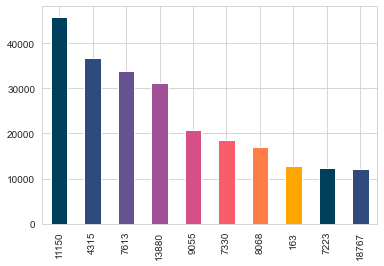

In [18]:
df.sort_values('total_price', ascending=False).head(10).total_price.plot(kind='bar', color=colors)

**Adım 7:** En fazla siparişi veren ilk 10 müşteriyi sıralayınız.

In [19]:
df.sort_values('total_transaction', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_transaction,total_price
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0,109.0,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.0,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0,87.0,8432.25,139.98,[ERKEK],88.0,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0,81.0,3997.55,242.81,[ERKEK],83.0,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0,74.0,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.0,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0,3.0,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.0,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57


In [20]:
df.groupby(['master_id'])['total_transaction'].sum().sort_values(ascending=False).head(10)

master_id
5d1c466a-9cfd-11e9-9897-000d3a38a36f    202.0
cba59206-9dd1-11e9-9897-000d3a38a36f    131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f    111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f     88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f     83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f     82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f     77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f     75.0
d696c654-2633-11ea-8e1c-000d3a38a36f     70.0
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f     70.0
Name: total_transaction, dtype: float64

<AxesSubplot:>

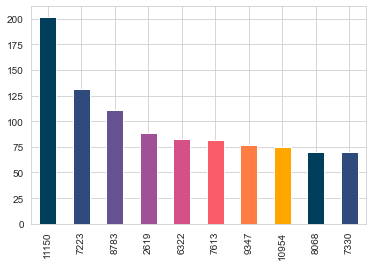

In [21]:
df.sort_values('total_transaction', ascending=False).head(10).total_transaction.plot(kind='bar', color=colors)

**Adım 8:** Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [22]:
def data_preparation(dataframe):
    df["total_price"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]
    df["total_transaction"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    df["first_order_date"] = pd.to_datetime(df["first_order_date"])
    df["last_order_date"] = pd.to_datetime(df["last_order_date"])
    df["last_order_date_online"] = pd.to_datetime(df["last_order_date_online"])
    df["last_order_date_offline"] = pd.to_datetime(df["last_order_date_offline"])
    return df

In [23]:
data_preparation(df).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_transaction,total_price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN],3.0,200.86
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR],4.0,375.93
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK],2.0,163.63
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]",5.0,1054.69
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]",2.0,165.96


**Görev 2:** RFM Metriklerinin Hesaplanması

In [24]:
today_date = dt.datetime(2021, 6, 1)

In [25]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date - last_order_date.max()).days,
                                   'total_transaction': lambda x: x,
                                   'total_price': lambda x: x,
                                   'interested_in_categories_12': lambda x: x})

In [26]:
rfm.columns = ['recency', 'frequency', 'monetary', 'interested_cats']

In [27]:
rfm.head(10)

,recency,frequency,monetary,interested_cats
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,"[ERKEK, COCUK, AKTIFSPOR]"
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,"[ERKEK, KADIN]"
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,"[AKTIFCOCUK, AKTIFSPOR]"
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,"[ERKEK, AKTIFSPOR]"
00136ce2-a562-11e9-a2fc-000d3a38a36f,203,2.0,359.45,[]
00142f9a-7af6-11eb-8460-000d3a38a36f,25,3.0,404.94,"[COCUK, AKTIFSPOR]"
0014778a-5b11-11ea-9a2c-000d3a38a36f,26,3.0,727.43,[]
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,126,2.0,317.91,[AKTIFCOCUK]


In [28]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0,134.458360,103.281149,2.00,43.00,111.00,202.00,367.0
frequency,19945.0,5.024768,4.742707,2.00,3.00,4.00,6.00,202.0
monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


**Görev 3:** RF Skorunun Hesaplanması

In [29]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [30]:
rfm['RF_SCORE'] = (rfm['recency_score'].astype(str) +
                   rfm['frequency_score'].astype(str))

In [31]:
rfm.head(10)

,recency,frequency,monetary,interested_cats,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,"[ERKEK, COCUK, AKTIFSPOR]",5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,"[ERKEK, KADIN]",1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,"[AKTIFCOCUK, AKTIFSPOR]",2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,"[ERKEK, AKTIFSPOR]",5,4,5,54
00136ce2-a562-11e9-a2fc-000d3a38a36f,203,2.0,359.45,[],2,1,2,21
00142f9a-7af6-11eb-8460-000d3a38a36f,25,3.0,404.94,"[COCUK, AKTIFSPOR]",5,2,2,52
0014778a-5b11-11ea-9a2c-000d3a38a36f,26,3.0,727.43,[],5,2,4,52
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,126,2.0,317.91,[AKTIFCOCUK],3,1,2,31


**Görev 4:** RF Skorunun Segment Olarak Tanımlanması

In [32]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [33]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [34]:
rfm.head(10)

,recency,frequency,monetary,interested_cats,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,"[ERKEK, COCUK, AKTIFSPOR]",5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,"[ERKEK, KADIN]",1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,"[AKTIFCOCUK, AKTIFSPOR]",2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,"[ERKEK, AKTIFSPOR]",5,4,5,54,champions
00136ce2-a562-11e9-a2fc-000d3a38a36f,203,2.0,359.45,[],2,1,2,21,hibernating
00142f9a-7af6-11eb-8460-000d3a38a36f,25,3.0,404.94,"[COCUK, AKTIFSPOR]",5,2,2,52,potential_loyalists
0014778a-5b11-11ea-9a2c-000d3a38a36f,26,3.0,727.43,[],5,2,4,52,potential_loyalists
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,126,2.0,317.91,[AKTIFCOCUK],3,1,2,31,about_to_sleep


In [35]:
def create_rfm(dataframe):
    today_date = dt.datetime(2021, 6, 1)

    rfm = df.groupby('master_id').agg(
        {'last_order_date': lambda last_order_date: (today_date - last_order_date.max()).days,
         'total_transaction': lambda x: x,
         'total_price': lambda x: x})

    rfm.columns = ['recency', 'frequency', 'monetary']

    rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

    rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

    rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

    rfm['RF_SCORE'] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_Risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

    return rfm

In [36]:
create_rfm(rfm).head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54,champions
00136ce2-a562-11e9-a2fc-000d3a38a36f,203,2.0,359.45,2,1,2,21,hibernating
00142f9a-7af6-11eb-8460-000d3a38a36f,25,3.0,404.94,5,2,2,52,potential_loyalists
0014778a-5b11-11ea-9a2c-000d3a38a36f,26,3.0,727.43,5,2,4,52,potential_loyalists
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,126,2.0,317.91,3,1,2,31,about_to_sleep


**#############################################**

**Adım 1:** Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

In [37]:
rfm[['segment', 'recency', 'frequency', 'monetary']].groupby('segment').agg(['mean', 'count'])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep       114.031649  1643   2.406573  1643   361.649373  1643
at_Risk              242.328997  3152   4.470178  3152   648.325038  3152
cant_loose           235.159129  1194  10.716918  1194  1481.652446  1194
champions             17.142187  1920   8.965104  1920  1410.708938  1920
hibernating          247.426303  3589   2.391474  3589   362.583299  3589
loyal_customers       82.557926  3375   8.356444  3375  1216.257224  3375
need_attention       113.037221   806   3.739454   806   553.436638   806
new_customers         17.976226   673   2.000000   673   344.049495   673
potential_loyalists   36.869744  2925   3.310769  2925   533.741344  2925
promising             58.694611   668   2.000000   668   334.153338   668

**Adım 2:** RFM analizi yardımıyla aşağıda verilen 2 case için ilgili profildeki müşterileri bulun ve müşteri id'lerini csv olarak kaydediniz.


**a.** FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçmek isteniliyor. Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

**b.** Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [38]:
type_a_customers = rfm.loc[
    (rfm['segment'] == 'champions') | (rfm['segment'] == 'loyal_customers') & rfm[
        'interested_cats'].str.contains(
        'KADIN')].reset_index()

In [39]:
type_a_customers['master_id'].to_csv('type_a_customers.csv')

In [40]:
type_b_customers = rfm.loc[
    (rfm['segment'] == 'cant_loose') | (rfm['segment'] == 'hibernating') | (
            rfm['segment'] == 'new_customers')].reset_index()

In [41]:
type_b_customers['master_id'].to_csv('type_b_customers.csv')